##  Banking Binary Classification Problem

### Problem
We would like to predict if given a bank client, are they likely to make a term deposit or not at the bank.

Dataset: bankingInfo.csv
     - if output == yes, then the client has made a term deposit at this bank, else they have not.

Project was built using the bc_ml_breast_cancer_pred.ipynb and the deep_learning.ipynb files provided by Dr. Sambriddhi Mainali along with the *A hands-on introduction to feed-forward neural networks using Tensorflow and Keras* Github Repository by Dr. Badri Adhikari found [here.](https://badriadhikari.github.io/AI-2022spring/NN-using-TF.html) 

### Phase 4: Feature Importance and Reduction
____
#### 4.1 Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import keras
import tensorflow 
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

In [2]:
#low_memory=False used to remove the warning for mixed data types in each columns
banking_data = pd.read_csv('./cleaned_banking_data.csv', low_memory=False)
banking_data.head()

,age,education,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,output
0,36,2,0,0,9,999,0,0,1.4,93.444,...,0,1,0,0,0,0,0,0,0,0
1,43,1,0,0,2,999,0,0,1.1,93.994,...,0,0,0,0,0,0,0,0,0,0
2,27,4,1,0,3,999,0,0,1.4,93.918,...,0,0,0,0,0,1,0,0,0,0
3,28,3,1,0,3,999,0,0,1.1,93.994,...,0,0,0,0,0,0,0,0,0,0
4,25,4,1,0,5,999,0,0,1.4,93.918,...,0,0,0,0,0,0,0,0,0,0


In [3]:
banking_data.shape

(8516, 27)

#### 4.2 Find and Evaluate the Accuracy of the Model for each Feature
To determine which features might not be good features for our model and could be adding bias or noise I will first build 26 models, each with only one input feature to see what the model's validation accuracy is for that feature.

In [4]:
# Shuffle Data
banking_data = banking_data.sample(frac=1)

#Get output data
X
y = banking_data['output']
index_20 = int(0.2 * len(y.index))  
# Split y into validation (20%) and training (80%)
y_test = y.iloc[:index_20]
y_train = y.iloc[index_20:]
print(f" y_train  has shape: {y_train.shape}")
print(f"y_test has shape: {y_test.shape}")

 y_train  has shape: (6813,)
y_test has shape: (1703,)


In [8]:
results = pd.DataFrame(columns=['Feature', 'Validation_Accuracy'])
X = banking_data.drop(['output'], axis = 'columns')

for feature in X.columns:
    print(f"Processing feature: {feature}")
    feature_X = banking_data.loc[:, [feature]]
    print(f"data frame x has shape: {feature_X.shape}")
    
    # Split x into validation (20%) and training (80%)
    X_train = feature_X.iloc[index_20:, :]
    X_test = feature_X.iloc[:index_20, :]
    min = X_train.min(axis = 0) 
    max = X_train.max(axis = 0) 
    X_train = (X_train - min) / (max - min)
    X_test = (X_test - min) / (max - min)

    feature_regression_model = Sequential()
    feature_regression_model.add(Dense(1, input_dim = len(X_train.columns), activation='sigmoid'))

    feature_regression_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    callback_a = ModelCheckpoint(filepath = 'feature_best.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
    callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
    history_regression_feature = feature_regression_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, batch_size=10, callbacks = [callback_a, callback_b])
    feature_regression_model.load_weights('feature_best.hdf5')
    regression_model_scores =  feature_regression_model.evaluate(X_test, y_test)
    accuracy = (regression_model_scores[1]*100)
    results.loc[len(results.index)] = [feature, accuracy] 


Processing feature: age
data frame x has shape: (8516, 1)
Epoch 1/60
653/682 [===========================>..] - ETA: 0s - loss: 0.6944 - accuracy: 0.5181
Epoch 1: val_loss improved from inf to 0.69332, saving model to feature_best.hdf5
682/682 [==============================] - 1s 1ms/step - loss: 0.6944 - accuracy: 0.5196 - val_loss: 0.6933 - val_accuracy: 0.5549
Epoch 2/60
648/682 [===========================>..] - ETA: 0s - loss: 0.6938 - accuracy: 0.5116
Epoch 2: val_loss improved from 0.69332 to 0.69326, saving model to feature_best.hdf5
682/682 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.5096 - val_loss: 0.6933 - val_accuracy: 0.4833
Epoch 3/60
682/682 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.4876
Epoch 3: val_loss improved from 0.69326 to 0.69325, saving model to feature_best.hdf5
682/682 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.4876 - val_loss: 0.6933 - val_accuracy: 0.4809
Epoch 4

In [9]:
 results.head

<bound method NDFrame.head of            Feature  Validation_Accuracy
0              age            44.274810
1        education            55.901349
2          housing            50.734001
3             loan            50.205517
4         campaign            53.082794
5            pdays            59.072226
6         previous            59.718144
7         poutcome            58.719903
8     emp.var.rate            71.579564
9   cons.price.idx            57.839108
10   cons.conf.idx            54.198474
11       euribor3m            71.579564
12        divorced            50.675279
13         married            53.200233
14          single            53.963596
15          admin.            53.258955
16     blue-collar            55.314153
17    entrepreneur            50.381678
18       housemaid            49.970639
19      management            50.088078
20         retired            51.790959
21   self-employed            50.440401
22        services            51.673520
23        

#### 4.3 Graph the Accuracy of the Model for each Feature

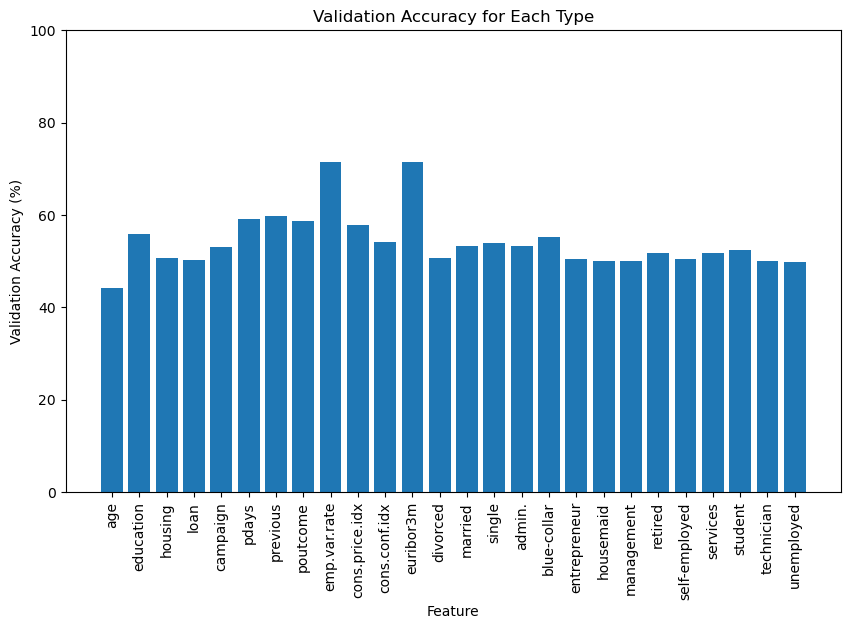

In [10]:
# Plotting the accuracy by feature bar graph
plt.figure(figsize=(10, 6))
plt.bar(results['Feature'], results['Validation_Accuracy'])
plt.xlabel('Feature')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy for Each Type')
plt.ylim(0, 100)
plt.xticks(rotation='vertical')
plt.show()

#### 4.4 Sort the Features by Accuracy

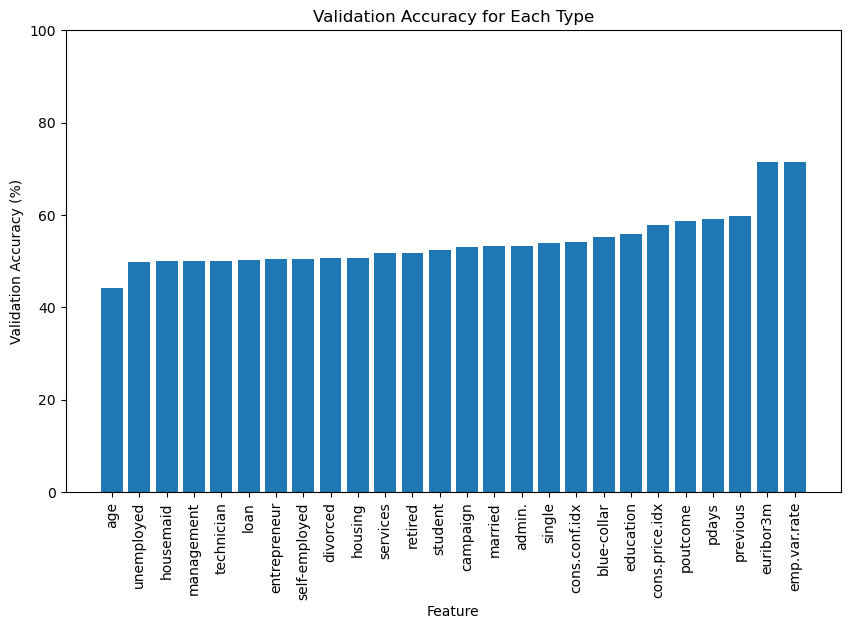

In [11]:
results = results.sort_values(by='Validation_Accuracy')

# plot the sorted result dataframe. 
plt.figure(figsize=(10, 6))
plt.bar(results['Feature'], results['Validation_Accuracy'])
plt.xlabel('Feature')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy for Each Type')
plt.ylim(0, 100)
plt.xticks(rotation='vertical')
plt.show()

#### 4.5 Train New Models and Dropping Features to Determine which Features are Best
To determine if our model would have performed better without specific features, I will build another 26 models. In each model I will remove a feature that I found earlier had low validation accuracy and led to poor predictions to see if I had removed specific features if the model would have performed better. 

In [ ]:
drop_X = banking_data.drop(['output'], axis = 'columns')
drop_result = pd.DataFrame(columns=['Features_Removed', 'Validation_Accuracy'])


for index, row in results.iterrows():

    feature_value = row['Feature']
    print(f"Drop Feature {feature_value}")
    drop_X = drop_X.drop([feature_value], axis = 'columns')
    print(f"data frame x has shape: {drop_X.shape}")
    print(drop_X.columns.tolist())
    # Split x into validation (20%) and training (80%)
    X_train = drop_X.iloc[index_20:, :]
    X_test = drop_X.iloc[:index_20, :]
    min = X_train.min(axis = 0) 
    max = X_train.max(axis = 0) 
    X_train = (X_train - min) / (max - min)
    X_test = (X_test - min) / (max - min)

    drop_regression_model = Sequential()
    drop_regression_model.add(Dense(1, input_dim = len(X_train.columns), activation='sigmoid'))

    drop_regression_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    callback_c = ModelCheckpoint(filepath = 'best_drop.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
    callback_d = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
    history_regression_drop = drop_regression_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, batch_size=10, callbacks = [callback_c, callback_d])
    drop_regression_model.load_weights('best_drop.hdf5')
    drop_regression_model_scores =  drop_regression_model.evaluate(X_test, y_test)
    accuracy = (drop_regression_model_scores[1]*100)

    drop_result.loc[len(drop_result.index)] = [f"Dropped {feature_value}", accuracy] 



Drop Feature age
data frame x has shape: (8516, 25)
['education', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'divorced', 'married', 'single', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed']
Epoch 1/60
663/682 [============================>.] - ETA: 0s - loss: 0.6683 - accuracy: 0.5983
Epoch 1: val_loss improved from inf to 0.63109, saving model to best_drop.hdf5
682/682 [==============================] - 2s 3ms/step - loss: 0.6672 - accuracy: 0.6002 - val_loss: 0.6311 - val_accuracy: 0.6788
Epoch 2/60
677/682 [============================>.] - ETA: 0s - loss: 0.6162 - accuracy: 0.6894
Epoch 2: val_loss improved from 0.63109 to 0.59908, saving model to best_drop.hdf5
682/682 [==============================] - 2s 2ms/step - loss: 0.6164 - accuracy: 0.6890 - val_loss: 0.5991 - val_accuracy: 0.7170
Epoch 3/60

In [15]:
drop_result.head

<bound method NDFrame.head of           Features_Removed  Validation_Accuracy
0              Dropped age            72.108042
1       Dropped unemployed            72.166765
2        Dropped housemaid            72.108042
3       Dropped management            72.108042
4       Dropped technician            72.108042
5             Dropped loan            71.931887
6     Dropped entrepreneur            72.049326
7    Dropped self-employed            72.108042
8         Dropped divorced            71.990603
9          Dropped housing            72.049326
10        Dropped services            72.284204
11         Dropped retired            71.579564
12         Dropped student            71.755725
13        Dropped campaign            71.462125
14         Dropped married            71.579564
15          Dropped admin.            71.462125
16          Dropped single            71.168524
17   Dropped cons.conf.idx            71.579564
18     Dropped blue-collar            71.579564
19       D

#### 4.6 Graph Results of Dropping Certain Features from the Model

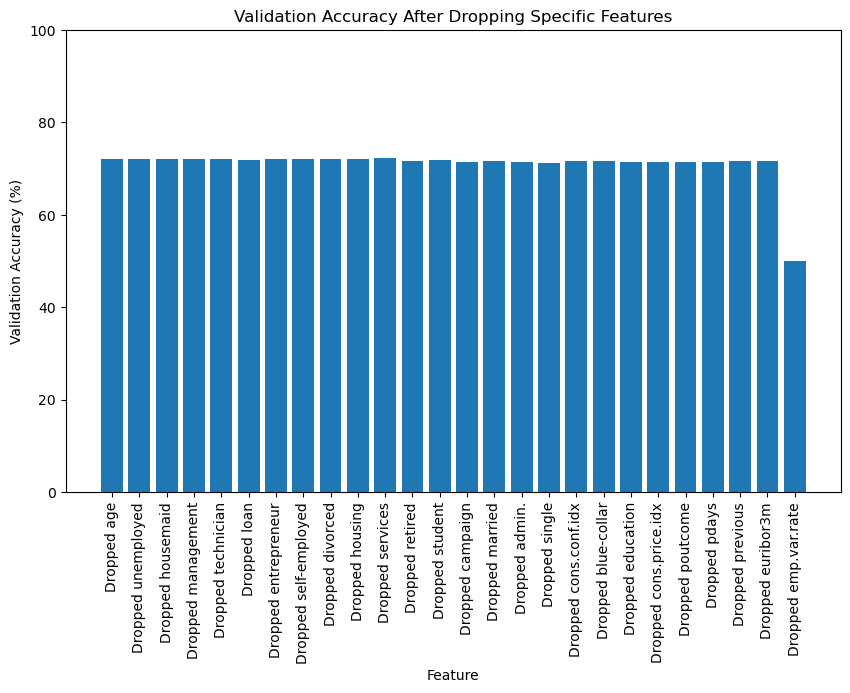

In [16]:
# Plotting the accuracy by feature bar graph
plt.figure(figsize=(10, 6)),
plt.bar(drop_result['Features_Removed'], drop_result['Validation_Accuracy'])
plt.xlabel('Feature')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy After Dropping Specific Features')
plt.ylim(0, 100)
plt.xticks(rotation='vertical')
plt.show()

#### Conclusion 
Looking at the results of dropping specific columns it does not appear that there were any particular columns that were adding severe noise or bias to the model because little changed in the overall accuracy of the model as the columns with low effect on the model's accuracy were removed from the dataset. Accuracy for the most part stayed about the same as the initial model built in Phase 3 that had about a 72% validation accuracy. I thought there would have been a bigger difference once columns like age, the euribor and previous contacts features were removed. This is because the age was not a good predictor for the output variable with only 44% accuracy and the euribor and previous features had higher accuracies with 71% and 59% respectively so I thought accuracy would have dropped more with their removal. In the end there was little change from iteration to iteration of the loop until the emp.var.rate feature was dropped which is when the model had no input features avaliable to train from so the model simply had to guess and ended up with a 50% accuracy rate because of basic probability. I suspect the minimal impact is because as seen earlier in Phase 1 none of these features had a strong correlation with the output variable so it does not appear that any of them have a strong impact on the prediction model. I believe that if there were features with a stronger correlation to the output variable then this model would potentially perform better overall and we would have seen a greater change in this phase. At the same time this was a good exercise because I'd questioned in Phase 1 if I should have removed the poutcome and pdays features from the model to prevent noise and looking at the results here that removing them would have not drastically changed my overall results as initially thought. 